In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import statistics as stats
import numpy as np
import scipy.stats
import pandas as pd
from statsmodels.stats import weightstats as stests
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.gofplots as sm
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import statsmodels.api as sm

Chapter 4: Q4.35

In [ ]:
data = pd.read_csv('drive/My Drive/Colab/4e4.csv', sep=',', na_values=".")
data

,Obs,SCCM125,SCCM160,SCCM200
0,1,2.7,4.6,4.6
1,2,2.6,4.9,2.9
2,3,4.6,5.0,3.4
3,4,3.2,4.2,3.5
4,5,3.0,3.6,4.1
5,6,3.8,4.2,5.1


a) Does flow rate affect each uniformity?
Answer using an analysis variance with alpha = 0.05

In [ ]:
stat, p = f_oneway(data['SCCM125'], data['SCCM160'], data['SCCM200'])
print('stat=%.3f, p=%.3f' %(stat, p))

stat=3.586, p=0.053


With a 95 confidence level the p value fails to meet it. Therefore we can determine that at least one of the SCCM does not flow. We cannot reject the null hypothesis.

b) Construct a box plot

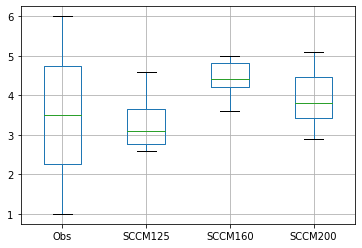

In [ ]:
data.boxplot()

Looking at the box plot we can ignore the observation box as that is not we are going to be looking at. We can see that the best option is SCCM160 due to the fact that it is smaller and provides more consistent data for us.

c) Plot residual versus predicted flow.

In [ ]:
linear_model = ols('SCCM125 ~ SCCM160 + SCCM200',data=data).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                SCCM125   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                 -0.510
Method:                 Least Squares   F-statistic:                    0.1553
Date:                Fri, 23 Sep 2022   Prob (F-statistic):              0.863
Time:                        02:43:48   Log-Likelihood:                -6.0249
No. Observations:                   6   AIC:                             18.05
Df Residuals:                       3   BIC:                             17.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3572      5.395      0.066      0.9

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


d) Based on the box plots the normality assumption seems reasonable as there isn't too many outliears and the mean line is close to symetric of the box plot.

HW Chapter 4: Q4.36

Yes, there is 3 such defects with the random sample.

Chapter 4 Q4.53

Test of mu = 30 vs not = 30
Assumed standard deviation = 1.3
N = 15
Mean = 31.400
SE Mean = 0.336
95% CI = (30.742, 32.058)
Z = ?
P = ?

a)
t test formula = (x-mu)/(standardeviation/(sqrt(n)))
(30-31.4)/(1.3/(sqrt(15))) = -4.17

Using the percentage points of the t distribution chart in the textbook. I found the nearest number to our t value to be 4.14. This gives us a P value of 0.0005, since it is two sided the value is 0.0005*2 = .001

With the calculated P value we can determine that we can reject the hypothesis. Meaning the mu equal to 30 is false. 

b) Since we can get a number that is either below or above 30 we can determine that this needs a two sided test.

c) Formula is z+-(Stasndard deviation)/(sqrt(n))
from 30 +- 1.399696181

Confidence interval = (28.60030382, 31.39969618)

d) (standard deviation)/(square root of sample size) 

1.3/(square root(15)) = 0.336

e) You would bring the P value back to one sided therefore:

.001/2 = 0.0005


Chapter 4 Q4.47:

In [ ]:
data3 = pd.read_csv('drive/My Drive/Colab/4e10.csv', sep=',', na_values=".")
data3

,BrakeHorsepower,RPM,RoadOctaneNumber,Compression
0,225,2000,90,100
1,212,1800,94,95
2,229,2400,88,110
3,222,1900,91,96
4,219,1600,86,100
5,278,2500,96,110
6,246,3000,94,98
7,237,3200,90,100
8,233,2800,88,105
9,224,3400,86,97


a) Linear regression model

In [ ]:
model = ols('BrakeHorsepower ~ RPM + RoadOctaneNumber + Compression', data3). fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        BrakeHorsepower   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Thu, 22 Sep 2022   Prob (F-statistic):            0.00317
Time:                        20:12:44   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -266.0312     92.674  

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


b) Conclusions I can draw is this data is that it is significant as the P value in the data. The P value of 0.00317 is greater than a confidance level of 95%.

c) Yes you need all 3 regressors. The low P values meet a confidence level of 95%, therefore it is significant to the data.